# Extraction of prosody features from audio files

Compute prosody features from continuous speech.

103 features are computed:

Num     Feature                                                          Description

--------------------------------------------------------------------------------------------------------------------------
                                Features based on F0
                                
---------------------------------------------------------------------------------------------------------------------------
1-6     F0-contour                                                       Avg., Std., Max., Min., Skewness, Kurtosis

7-12    Tilt of a linear estimation of F0 for each voiced segment        Avg., Std., Max., Min., Skewness, Kurtosis

13-18   MSE of a linear estimation of F0 for each voiced segment         Avg., Std., Max., Min., Skewness, Kurtosis

19-24   F0 on the first voiced segment                                   Avg., Std., Max., Min., Skewness, Kurtosis

25-30   F0 on the last voiced segment                                    Avg., Std., Max., Min., Skewness, Kurtosis

--------------------------------------------------------------------------------------------------------------------------
                                Features based on energy
                                
---------------------------------------------------------------------------------------------------------------------------
31-34   energy-contour for voiced segments                               Avg., Std., Skewness, Kurtosis

35-38   Tilt of a linear estimation of energy contour for V segments     Avg., Std., Skewness, Kurtosis

39-42   MSE of a linear estimation of energy contour for V segment       Avg., Std., Skewness, Kurtosis

43-48   energy on the first voiced segment                               Avg., Std., Max., Min., Skewness, Kurtosis

49-54   energy on the last voiced segment                                Avg., Std., Max., Min., Skewness, Kurtosis

55-58   energy-contour for unvoiced segments                             Avg., Std., Skewness, Kurtosis

59-62   Tilt of a linear estimation of energy contour for U segments     Avg., Std., Skewness, Kurtosis

63-66   MSE of a linear estimation of energy contour for U segments      Avg., Std., Skewness, Kurtosis

67-72   energy on the first unvoiced segment                             Avg., Std., Max., Min., Skewness, Kurtosis

73-78   energy on the last unvoiced segment                              Avg., Std., Max., Min., Skewness, Kurtosis

--------------------------------------------------------------------------------------------------------------------------
                                Features based on duration
                                
---------------------------------------------------------------------------------------------------------------------------
79      Voiced rate                                                      Number of voiced segments per second

80-85   Duration of Voiced                                               Avg., Std., Max., Min., Skewness, Kurtosis

86-91   Duration of Unvoiced                                             Avg., Std., Max., Min., Skewness, Kurtosis

92-97   Duration of Pauses                                               Avg., Std., Max., Min., Skewness, Kurtosis

98-103  Duration ratios                                                  Pause/(Voiced+Unvoiced), Pause/Unvoiced, Unvoiced/(Voiced+Unvoiced),
                                                                         Voiced/(Voiced+Unvoiced), Voiced/Puase, Unvoiced/Pause

---------------------------------------------------------------------------------------------------------------------------



In [1]:
import sys
sys.path.append("../")
from prosody.prosody import Prosody

In [2]:
prosodyf=Prosody()
file_audio="../audios/001_ddk1_PCGITA.wav"

## Extract features and return them as a numpy array

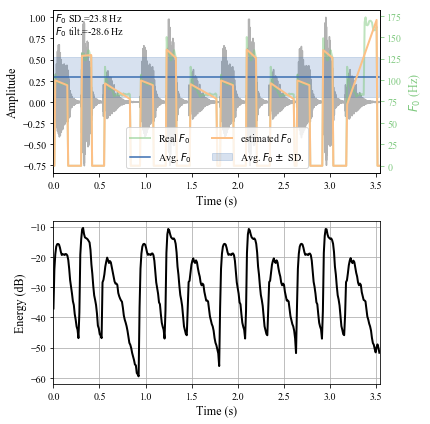

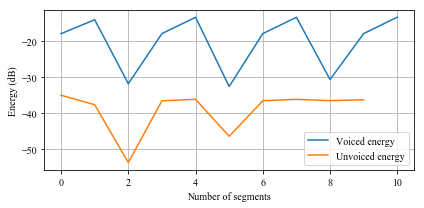

(103,)


In [3]:
features1=prosodyf.extract_features_file(file_audio, static=True, plots=True, fmt="npy")
print(features1.shape)

## Extract static features and return them as a dataframe 

In [4]:
features1=prosodyf.extract_features_file(file_audio, static=True, plots=False, fmt="csv")
print(features1)

      1F0ku      1F0max    1F0mean     1F0min    1F0skw    1F0std       F0avg  \
0  6.210762  106.297119  96.801537  94.436989  2.612422  2.823843  103.519859   

     F0kurt       F0max      F0min       ...        stdEvoiced  stddurpause  \
0  0.598902  173.218719  80.561127       ...          3.389881          0.0   

   stddurunvoiced  stddurvoiced  stdlastEunvoiced  stdlastEvoiced  \
0        0.049385      0.069055          7.232886        2.704041   

   stdmseEunvoiced  stdmseEvoiced  stdtiltEunvoiced  stdtiltEvoiced  
0        19.314991       0.634663        605.019587       30.365483  

[1 rows x 103 columns]


## Extract dynamic features and return them as a dataframe

In [5]:
features1=prosodyf.extract_features_file(file_audio, static=False, plots=False, fmt="csv")
print(features1)
print(features1.head())

        Ecoef0    Ecoef1    Ecoef2    Ecoef3    Ecoef4    Ecoef5  \
0   105.702776 -0.000302  0.004222  0.027340 -0.569139  1.528803   
1   130.392459 -0.002249  0.043573 -0.343251  1.398935 -3.227125   
2   114.251205  0.000021 -0.001472  0.037513 -0.430769  1.134978   
3   105.637903 -0.000249  0.002923  0.038836 -0.610899  1.577689   
4   149.150462  0.001398 -0.039493  0.360269 -1.197304  0.399711   
5   113.908886  0.000021 -0.001443  0.036175 -0.410373  1.019496   
6   105.632975 -0.000250  0.002927  0.038802 -0.610802  1.577603   
7   149.150063  0.001398 -0.039489  0.360243 -1.197224  0.399601   
8   114.367517  0.000037 -0.002326  0.052690 -0.536308  1.358722   
9   105.640711 -0.000236  0.002534  0.042916 -0.629691  1.613324   
10  147.851988  0.003024 -0.072634  0.599051 -1.910331  1.137942   
11  103.886557  0.000021 -0.001446  0.036454 -0.414043  1.030153   

    Voiced duration  f0coef0   f0coef1   f0coef2   f0coef3    f0coef4  \
0        -16.680449     0.13 -0.001438  0.

## Extract dynamic features and return them as a torch tensor

In [6]:
features1=prosodyf.extract_features_file(file_audio, static=False, plots=False, fmt="torch")
print(features1.dtype)
print(features1.size())

torch.float64
torch.Size([12, 13])


## Extract static features from a path return them as a numpy array

In [7]:
path_audio="../audios/"
features1=prosodyf.extract_features_path(path_audio, static=True, plots=False, fmt="npy")
print(features1.shape)

Processing 098_u1_PCGITA.wav: 100%|██████████| 4/4 [00:00<00:00, 19.14it/s]      

(4, 103)
